In [82]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

from keras import backend as K

from keras.datasets import mnist
from keras.layers import (Activation, BatchNormalization, Concatenate, Dense,
                          Dropout, Flatten, Input, Lambda, Reshape)
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [83]:
df = pd.read_csv('/Users/xiafei/code/itu-ml-challenge/csv/dataset.csv')

In [84]:
print(df.shape)
df.head()

(9670, 1000)


,Unnamed: 0,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/local_gb_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/current_workload,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
0,0,16,20,0,48,41472,257790,0,12,2,...,0.100425,174853276.0,11.431817,1263588.0,0.0,0.0,0.099783,1593395580,ixnetwork-traffic-start,0
1,1,16,20,0,48,41472,257790,0,12,2,...,0.099506,174854074.0,13.313681,1263595.0,0.0,0.0,0.116705,1593395640,ixnetwork-traffic-start,0
2,2,16,20,0,48,41472,257790,0,12,2,...,0.099506,174854758.0,13.313681,1263601.0,0.0,0.0,0.100463,1593395700,ixnetwork-traffic-start,0
3,3,16,20,0,48,41472,257790,0,12,2,...,0.099826,174855556.0,13.277844,1263608.0,0.0,0.0,0.116223,1593395760,ixnetwork-traffic-start,0
4,4,16,20,0,48,41472,257790,0,12,2,...,0.116494,174856338.0,13.277844,1263615.0,0.0,0.0,0.116614,1593395820,ixnetwork-traffic-start,0


In [85]:
#delete zero colums
df = df.loc[:,(df !=0).any(axis=0)]

In [86]:
print(df.shape)
df.head()

(9670, 663)


,Unnamed: 0,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,p_/computes0/cpu_info/topology/sockets,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
0,0,16,20,48,41472,257790,12,2,2,1,...,13.236069,1401532.0,0.100425,174853276.0,11.431817,1263588.0,0.099783,1593395580,ixnetwork-traffic-start,0
1,1,16,20,48,41472,257790,12,2,2,1,...,11.438221,1401538.0,0.099506,174854074.0,13.313681,1263595.0,0.116705,1593395640,ixnetwork-traffic-start,0
2,2,16,20,48,41472,257790,12,2,2,1,...,11.438221,1401545.0,0.099506,174854758.0,13.313681,1263601.0,0.100463,1593395700,ixnetwork-traffic-start,0
3,3,16,20,48,41472,257790,12,2,2,1,...,11.429972,1401551.0,0.099826,174855556.0,13.277844,1263608.0,0.116223,1593395760,ixnetwork-traffic-start,0
4,4,16,20,48,41472,257790,12,2,2,1,...,11.429972,1401558.0,0.116494,174856338.0,13.277844,1263615.0,0.116614,1593395820,ixnetwork-traffic-start,0


In [87]:
df[5000:5005]

,Unnamed: 0,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,p_/computes0/cpu_info/topology/sockets,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
5000,5000,16,20,48,41472,257790,12,2,2,1,...,13.020161,1461017.0,0.116200,224130340.0,12.720986,1336173.0,0.116576,1593696120,tap-delay-stop,8
5001,5001,16,20,48,41472,257790,12,2,2,1,...,13.378133,1461023.0,0.117213,224131138.0,11.382974,1336180.0,0.100012,1593696180,tap-delay-start,7
5002,5002,16,20,48,41472,257790,12,2,2,1,...,11.339669,1461038.0,0.099812,224131900.0,13.354229,1336187.0,0.116696,1593696240,tap-delay-start,7
5003,5003,16,20,48,41472,257790,12,2,2,1,...,173.755100,1461049.0,0.249207,224132740.0,12.665939,1336195.0,0.116739,1593696300,tap-delay-start,7
5004,5004,16,20,48,41472,257790,12,2,2,1,...,60.206841,1461057.0,0.183353,224132740.0,13.985868,1336203.0,0.133446,1593696360,tap-delay-start,7


In [88]:
columns = df.columns
x = df[columns[1:-3]]
print(x.shape)
x.head()

(9670, 659)


,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,p_/computes0/cpu_info/topology/sockets,p_/computes0/running_vms,...,v_/ports#link-tr-tr-a-1-x/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-x/metrics/network-outgoing-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate
0,16,20,48,41472,257790,12,2,2,1,5,...,1398105.0,0.116706,184773664.0,13.236069,1401532.0,0.100425,174853276.0,11.431817,1263588.0,0.099783
1,16,20,48,41472,257790,12,2,2,1,5,...,1398111.0,0.100033,184774348.0,11.438221,1401538.0,0.099506,174854074.0,13.313681,1263595.0,0.116705
2,16,20,48,41472,257790,12,2,2,1,5,...,1398118.0,0.100033,184775146.0,11.438221,1401545.0,0.099506,174854758.0,13.313681,1263601.0,0.100463
3,16,20,48,41472,257790,12,2,2,1,5,...,1398124.0,0.117207,184775830.0,11.429972,1401551.0,0.099826,174855556.0,13.277844,1263608.0,0.116223
4,16,20,48,41472,257790,12,2,2,1,5,...,1398131.0,0.116614,184776612.0,11.429972,1401558.0,0.116494,174856338.0,13.277844,1263615.0,0.116614


In [89]:
#delete zero colums
x = x.loc[:,(x !=0).any(axis=0)]

In [90]:
print(x.shape)

(9670, 659)


In [91]:
x = x.values.reshape(-1, 5, 659, 1)

In [92]:
x.shape

(1934, 5, 659, 1)

In [93]:
y = df[columns[-1]]

In [94]:
y_train = y.values.reshape(-1, 1)

array([[<AxesSubplot:title={'center':'v_type_code'}>]], dtype=object)

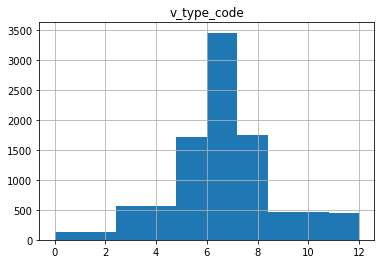

In [95]:
df.hist('v_type_code')

In [96]:
y.describe()

count    9670.000000
mean        6.540021
std         2.175989
min         0.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: v_type_code, dtype: float64

In [97]:
len(y.values[::5])

1934

# GAN

In [98]:
# input traffic dimensions
traf_rows = 5
traf_cols = 659 #996
channels = 1
traf_shape = (traf_rows, traf_cols,channels)

mid_layer = 200

# Size of the noise vector, used as input to the Generator
z_dim = 10

In [103]:
class Dataset:
    def __init__(self, num_labeled):

        # Number labeled examples to use for training
        self.num_labeled = num_labeled

        # Load dataset
        df = pd.read_csv('/Users/xiafei/code/itu-ml-challenge/csv/dataset.csv')
#         df_test = pd.read_csv('/Users/xiafei/code/itu-ml-challenge/csv/testset.csv')
        
        # delete zero columns
        df = df.loc[:,(df !=0).any(axis=0)]
        
        self.columns = df.columns
        X = df[self.columns[1:-3]]
        Y = df[self.columns[-1]]
        
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, Y, train_size=5000, shuffle=False);

        # Normalization
        self.ss = StandardScaler()
#         self.ss = MinMaxScaler() # [0-1]
        self.x_train = self.ss.fit_transform(self.x_train)
        self.x_test = self.ss.fit_transform(self.x_test)
        
        print('x_train:', self.x_train.shape)
        print('x_test:', self.x_test.shape)
        print('x_train:', self.x_train.shape)
        print('x_test:', self.x_test.shape)
        

        def preprocess_trafs(x):
            print('reshape', x.shape,'to',traf_rows, traf_cols)
#             x = x.values.reshape(-1, traf_rows, traf_cols, 1)
            x = x.reshape(-1, traf_rows, traf_cols, 1)
            return x

        def preprocess_labels(y):
            return y.values[::5].reshape(-1, 1)

        # Training data
        self.x_train = preprocess_trafs(self.x_train)
        self.y_train = preprocess_labels(self.y_train)

        # Testing data
        self.x_test = preprocess_trafs(self.x_test)
        self.y_test = preprocess_labels(self.y_test)
        
        print('processed:')
        print(self.x_train.shape)
        print(self.y_train.shape)
        print(self.x_test.shape)
        print(self.y_test.shape)

    def batch_labeled(self, batch_size):
        # Get a random batch of labeled images and their labels
#         idx = np.random.randint(0, self.num_labeled, batch_size)
        rd = np.random.randint(0, self.num_labeled // batch_size)
        idx = np.arange(rd * batch_size, (rd+1) * batch_size)
        
        trafs = self.x_train[idx]
        labels = self.y_train[idx]
        return trafs, labels

    def batch_unlabeled(self, batch_size):
        # Get a random batch of unlabeled images
        idx = np.random.randint(0, self.x_train.shape[0],
                                batch_size)
        trafs = self.x_train[idx]
        return trafs

    def training_set(self):
        x_train = self.x_train[range(self.num_labeled)]
        y_train = self.y_train[range(self.num_labeled)]
        return x_train, y_train

    def test_set(self):
        return self.x_test, self.y_test

In [104]:
# Number of labeled examples to use (rest will be used as unlabeled)
num_labeled = 1000

dataset = Dataset(num_labeled)

x_train: (5000, 659)
x_test: (4670, 659)
x_train: (5000, 659)
x_test: (4670, 659)
reshape (5000, 659) to 5 659
reshape (4670, 659) to 5 659
processed:
(1000, 5, 659, 1)
(1000, 1)
(934, 5, 659, 1)
(934, 1)


## Generator

In [105]:
def build_generator(traf_shape, z_dim):

    model = Sequential()

    # Fully connected layer
    model.add(Dense(mid_layer, input_dim=z_dim))
    
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with tanh activation
    model.add(Dense(traf_rows*traf_cols*channels, activation='tanh'))

    # Reshape the Generator output to image dimensions
    model.add(Reshape(traf_shape))

    return model

## Discriminator

In [106]:
def build_discriminator_net(traf_shape):

    model = Sequential()

    # Flatten the input image
    model.add(Flatten(input_shape=traf_shape))

    # Fully connected layer
    model.add(Dense(mid_layer))
    
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with sigmoid activation
    model.add(Dense(num_classes))
    #model.add(Dense(num_classes, activation='sigmoid'))

    return model

In [107]:
def build_discriminator_supervised(discriminator_net):

    model = Sequential()

    model.add(discriminator_net)

    # Softmax activation, giving predicted probability distribution over the real classes
    model.add(Activation('softmax'))

    return model

In [108]:
def build_discriminator_unsupervised(discriminator_net):

    model = Sequential()

    model.add(discriminator_net)

    def predict(x):
        # Transform distribution over real classes into a binary real-vs-fake probability
        prediction = 1.0 - (1.0 /
                            (K.sum(K.exp(x), axis=-1, keepdims=True) + 1.0))
        return prediction

    # 'Real-vs-fake' output neuron defined above
    model.add(Lambda(predict))

    return model

## Build the Model

In [109]:
def build_gan(generator, discriminator):

    model = Sequential()

    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)

    return model

In [110]:
num_classes = 13

In [111]:
# Core Discriminator network:
# These layers are shared during supervised and unsupervised training
discriminator_net = build_discriminator_net(traf_shape)

# Build & compile the Discriminator for supervised training
discriminator_supervised = build_discriminator_supervised(discriminator_net)
discriminator_supervised.compile(loss='categorical_crossentropy',
                                 metrics=['accuracy'],
                                 optimizer=Adam())

# Build & compile the Discriminator for unsupervised training
discriminator_unsupervised = build_discriminator_unsupervised(discriminator_net)
discriminator_unsupervised.compile(loss='binary_crossentropy',
                                   optimizer=Adam())

# Build the Generator
generator = build_generator(traf_shape, z_dim)

# Keep Discriminator’s parameters constant for Generator training
discriminator_unsupervised.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
# Note that we are using the Discriminator version with unsupervised output
gan = build_gan(generator, discriminator_unsupervised)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

## Training

In [112]:
supervised_losses = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):
    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        trafs, batch_labels = dataset.batch_labeled(batch_size)
        labels = to_categorical(batch_labels, num_classes=num_classes)
        trafs_unlabeled = dataset.batch_unlabeled(batch_size)
        
        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, z_dim))
        gen_trafs = generator.predict(z)

        # Train Discriminator
        d_loss_supervised, accuracy = discriminator_supervised.train_on_batch(trafs, labels)
        d_loss_real = discriminator_unsupervised.train_on_batch(trafs_unlabeled, real)
        d_loss_fake = discriminator_unsupervised.train_on_batch(gen_trafs, fake)
        d_loss_unsupervised = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, z_dim))
        gen_trafs = generator.predict(z)

        # Train Generator
        g_loss = gan.train_on_batch(z, np.ones((batch_size, 1)))

        if (iteration + 1) % sample_interval == 0:
            # Save losses and accuracies so they can be plotted after training
            supervised_losses.append(d_loss_supervised)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print(
                "%d [D loss supervised: %.4f, acc.: %.2f%%] [D loss unsupervised: %.4f] [G loss: %f]"
                % (iteration + 1, d_loss_supervised, 100 * accuracy,
                   d_loss_unsupervised, g_loss))
            
            
            print(gen_trafs.shape)
            rs_gen_trafs = gen_trafs.reshape(traf_rows * batch_size, traf_cols)
            rs_gen_trafs = dataset.ss.inverse_transform(rs_gen_trafs)
            print(rs_gen_trafs.shape)
            rs_df = pd.DataFrame(rs_gen_trafs, columns = dataset.columns[1:-3])
            
            batch_labels = pd.DataFrame(batch_labels)
            rs_label = pd.DataFrame()

            for row_idx in range(batch_labels.shape[0]):
                for _ in range(5):
                    rs_label = rs_label.append(batch_labels.iloc[row_idx])
            
            rs_label = rs_label.reset_index(drop=True)
            print(rs_label.shape)
            rs_df['v_type_code'] = rs_label
            
            # Output a sample of generated image
            #sample_images(generator_traf)
#             _a = gen_trafs[0]
#             _a[:,0,0] = (_a[:,0,0] + 1) * 1500 / 2
#             _a[:,1,0] = (_a[:,1,0] + 1) * 105 / 2
            save_file = './sample_' + str(iteration) + '.csv'
            rs_df.to_csv(save_file)

## Train the GAN and Inspect Output

In [113]:
# Set hyperparameters
iterations = 4000
batch_size = 200
sample_interval = 400

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

/Users/xiafei/opt/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


400 [D loss supervised: 0.0446, acc.: 100.00%] [D loss unsupervised: 0.0128] [G loss: 4.801912]
(200, 5, 659, 1)
(1000, 659)
(1000, 1)
800 [D loss supervised: 0.0080, acc.: 100.00%] [D loss unsupervised: 0.0032] [G loss: 6.588862]
(200, 5, 659, 1)
(1000, 659)
(1000, 1)
1200 [D loss supervised: 0.0050, acc.: 100.00%] [D loss unsupervised: 0.0012] [G loss: 7.619360]
(200, 5, 659, 1)
(1000, 659)
(1000, 1)
1600 [D loss supervised: 0.0042, acc.: 100.00%] [D loss unsupervised: 0.0323] [G loss: 7.522418]
(200, 5, 659, 1)
(1000, 659)
(1000, 1)
2000 [D loss supervised: 0.0027, acc.: 100.00%] [D loss unsupervised: 0.0032] [G loss: 7.721929]
(200, 5, 659, 1)
(1000, 659)
(1000, 1)
2400 [D loss supervised: 0.0061, acc.: 100.00%] [D loss unsupervised: 0.0023] [G loss: 9.156468]
(200, 5, 659, 1)
(1000, 659)
(1000, 1)
2800 [D loss supervised: 0.0046, acc.: 100.00%] [D loss unsupervised: 0.0037] [G loss: 7.079321]
(200, 5, 659, 1)
(1000, 659)
(1000, 1)
3200 [D loss supervised: 0.0027, acc.: 100.00%] [D

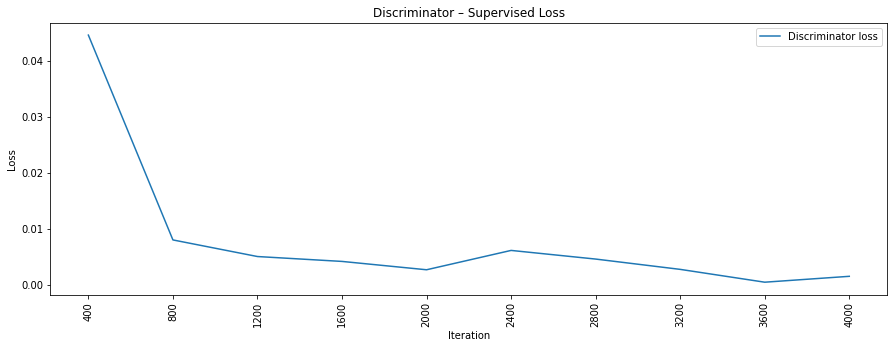

In [114]:
losses = np.array(supervised_losses)

# Plot Discriminator supervised loss
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses, label="Discriminator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Discriminator – Supervised Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

# Diff dataset

In [115]:
def get_diff_dataset2(dataset, X_train):
    diff_dataset = pd.DataFrame(columns=dataset.columns)
    cur_type = 0
    start_index = 6

    for index, row in dataset.iterrows():
        if index < 6:
            pass

        row_type = row[-1]
        if index == dataset.shape[0] - 1:
            # last line
            end_index = index
            diff_df = X_train.loc[[start_index-1, end_index]].diff().loc[[end_index]]
            diff_df['v_type_code'] = cur_type
            diff_dataset = diff_dataset.append(diff_df, ignore_index=True, sort=False)

        elif row_type != cur_type:
            end_index = index - 1
            diff_df = X_train.loc[[start_index-1, end_index]].diff().loc[[end_index]]
            diff_df['v_type_code'] = cur_type
            diff_dataset = diff_dataset.append(diff_df, ignore_index=True, sort=False)
            # new start
            start_index = index
            cur_type = row_type

    diff_dataset['v_type_code'] = pd.to_numeric(diff_dataset['v_type_code'])
    return diff_dataset

In [119]:
dataset_path = './sample_2799.csv'
diff_dataset_path = './diff_sample_2799.csv'

dataset = pd.read_csv(dataset_path)
print('dataset', dataset.shape)
# Segmentation training tests
column = dataset.columns
X_train = dataset[column[:-1]]
y_train = dataset[column[-1]]

print('get diff dataset...')
diff_dataset = get_diff_dataset2(dataset, X_train)

print('writing to csv..')
diff_dataset.to_csv(diff_dataset_path)
print('diff_dataset:', diff_dataset.shape)

dataset (1000, 661)
get diff dataset...


/Users/xiafei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


writing to csv..
diff_dataset: (193, 661)


In [120]:
dataset.head()

,Unnamed: 0,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,p_/computes0/cpu_info/topology/sockets,...,v_/ports#link-tr-tr-a-1-x/metrics/network-outgoing-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_type_code
0,0,15.001137,20.999386,47.000404,41473.000,257791.0,12.999881,2.999250,2.999397,1.999730,...,-3.782104,241061090.0,4893.9897,1507168.6,-3.842875,240655740.0,2663.7078,1374223.9,2.347688,3.0
1,1,15.000092,20.998756,47.000492,41471.000,257789.0,11.001966,2.998003,2.999530,0.000137,...,-3.847382,246739500.0,-4688.0400,1506730.5,-3.843635,242009390.0,2665.4167,1359227.8,2.347825,3.0
2,2,16.998695,19.000420,48.999844,41471.000,257791.0,12.999615,2.994805,2.996756,0.006095,...,-1.113025,230728800.0,-4437.8030,1507347.5,1.402934,241031300.0,2662.8992,1374370.4,-1.318525,3.0
3,3,15.006442,20.997887,47.000420,41473.000,257791.0,11.001045,2.999379,2.999726,0.000603,...,-2.900382,235586780.0,4147.1587,1507345.2,-3.725357,242103860.0,2663.1018,1373355.6,-1.819487,3.0
4,4,15.000463,19.000256,48.994957,41471.004,257789.0,11.001375,2.997632,2.998675,1.999826,...,-3.844071,245031800.0,-4686.3394,1506923.2,-3.843395,234390700.0,-1156.4761,1374409.1,2.349252,3.0
